Modified from O. Awile and T. Milosevic and Aramata Interdisciplinary week

**Work in progress ...**

# Simulating particle diffusion in different temperatures

Diffusion of particles is a random process, which is caused by the random motion of air or water molecules.
Diffusion can be modeled using a random walk. Random walk describes the trajectory of a particle in subsequent timesteps, where the particle moves in a random direction and distance until bumping into another particle.

Diffusion coefficient plays an important role in the speed of particle diffusion, and it depends on several properties of a liquid or a gas, including the temperature and the density. 
Choosing a larger diffusion coefficient would then mean we could simulate the higher temperature. 

## Importing necessary libraries

In [1]:
#### import all necessary libraries first ###

# numpy is a numerics library, which allows us to use mathematical functions on vectors, matrices etc. 
# http://www.numpy.org/ 

# numpy.random is a numpy library for different random number generators 
# http://docs.scipy.org/doc/numpy/reference/routines.random.html 

# matplotlib is a plotting library, allowing us to plot beautiful graphs 
# http://matplotlib.org/ 

import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt

## Simulation of a random walk (one particle)

The first assignment is to simulate a random walk diffusion process of a single particle moving in one dimension (1D).

We need to decide how many timesteps we will allow the particle to move and what is the diffusion coefficient. 
We also need to define the starting position of the particle, for example the x position = 0.

For every new timestep, we will allow the particle to move "randomly" in 1D space, meaning either left or right from the current position, and by a normally distributed distance (following the normal distribution). If the particle moves +10, it will find itself on a position x = 10. If the particle next time moves -3, it would end up at a position x = 7.


Text(0, 0.5, 'x position')

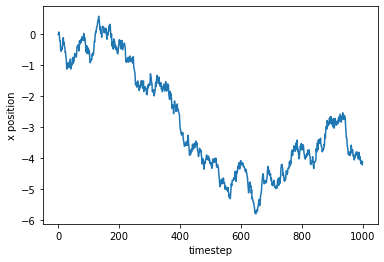

In [2]:
# A particle in 1D performing a random walk:

nsteps = 1000 # number of timesteps in the random walk
disp = 0.1  # proportional to the diffusion coefficient

xpos = np.zeros(nsteps)  # np.zeros creates an array of zeros, an array of the size equal to number of timesteps
oldx = 0.0 # initial position of the particle
for i in range(1,nsteps): # iterate for every timestep
    newx = oldx + nprand.randn()*disp 
    # randn() takes a random value from the “standard normal” distribution, with mean = 0, stdev = 1
    # random displacement is multiplied by the diffusion coefficient and added to the last position of the particle
    xpos[i] = newx # fills the array with the value obtained from a random displacement
    oldx = newx # updates the current position of the particle
plt.plot(range(nsteps),xpos) # creates a plot with number of timesteps on the x axis, and x positions on the y axis
plt.xlabel('timestep') # labels the x axis
plt.ylabel('x position') # labels the y axis

You should try this same code several times, and you will see that the graph you generated is always unique! 

This shows you that simulation of random walk of particles always returns different, random results.

## Simulation of a random walk (many particles)

Let's try to simulate many particles diffusing in 1D space, in the same way as we did for one particle. 

[ 0.         -0.35088101 -0.49084282 -0.42028523 -0.85966949 -1.23300346
 -1.03328401 -1.2107546  -0.56022219  0.3680653 ]


Text(0, 0.5, 'x position')

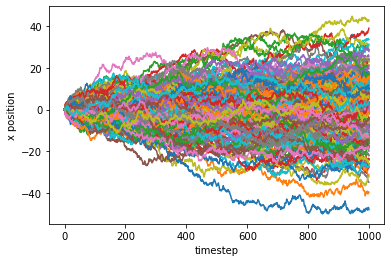

In [3]:
# now redo this for many particles
nsteps = 1000 # number of timesteps in the random walk
disp = 0.5  # proportional to the diffusion coefficient
nparts = 200  # repeat for 200 particles

xpos = np.zeros((nparts,nsteps)) 
# array with nparts rows and nsteps columns, describing the position of each particle at each timestep

for r in range(nparts): 
    # we add another loop because now want to simulate many particles diffusing from a single starting position 
    # we first look at what happens with the particle 0, then particle 1... all the way to the last particle
    oldx = 0.0 # starting position of the particle
    for i in range(1,nsteps):
        newx = oldx + nprand.randn()*disp
        xpos[r,i] = newx # r signifies the number of the particle, i signifies the position at the current timestep
        oldx = newx
    plt.plot(range(nsteps),xpos[r,:]) # : helps us plot all the values, for the particle we are currently looking at

print(xpos[0,:10]) # this line is just to check what is the trajectory of particle 0, during the first 10 timesteps
    
plt.xlabel('timestep') # labels the x axis
plt.ylabel('x position') # labels the y axis

We now see what would happen with the random walk diffusion of many particles. It is very hard to follow and analyse all the trajectories, but we can see that they are going on average further and further away from the initial starting position. 


## Representing the diffusion of particles in the above example using histograms

To analyse this process of diffusion, we can make a histogram at different timesteps, to see more easily where are the particles located.

We can choose several timesteps, and see how much did the particles move away from the initial position. 

Text(0, 0.5, 'number of particles')

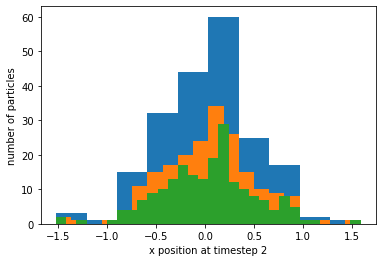

In [4]:
# hist() is a function that plots a histogram, we need to specify the values to plot and the size of the bins

plt.hist(xpos[:,1],10) # we want to plot position of all particles (:) at the second timestep, and we set the number of bins to 10
plt.hist(xpos[:,1],20) # we set the number of bins to 20
plt.hist(xpos[:,1],30) # we set the number of bins to 30

plt.xlabel('x position at timestep 2') # labels the x axis
plt.ylabel('number of particles') # labels the y axis

Text(0, 0.5, 'number of particles')

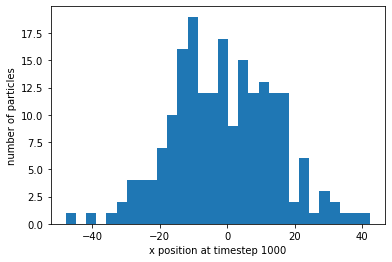

In [5]:
# we can also check where the particles are at the last timestep (999)

plt.hist(xpos[:,999],30) # we want to plot position of all particles (:) at the last timestep, and we set the bin number to 30

plt.xlabel('x position at timestep 1000') # labels the x axis
plt.ylabel('number of particles') # labels the y axis

If we want to compare the position of particles at 3 different timesteps, we can plot 3 histograms with the same shared axes

Text(-30, 30, 't=999')

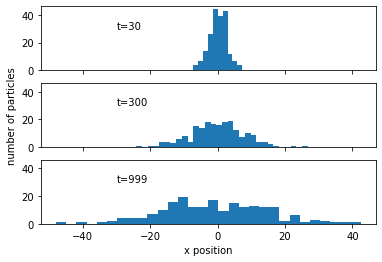

In [6]:
# plotting 3 histograms together as a single figure, where histograms share the same axes

f, axarr = plt.subplots(3, sharex=True,sharey =True) 
# subplots() function takes as an argument the number of plots
# we also specify we want the x and y axes to be shared, that means that the min and max will be the same

plt.xlabel('x position')
axarr[0].hist(xpos[:,30],10) # specify what to plot in the first histogram
axarr[1].hist(xpos[:,300],30) # specify what to plot in the second histogram
axarr[2].hist(xpos[:,999],30) # specify what to plot in the third histogram
axarr[1].set_ylabel('number of particles')

axarr[0].annotate('t=30',xy=(-30,30)) # mark the timestep for each histogram
axarr[1].annotate('t=300',xy=(-30,30))
axarr[2].annotate('t=999',xy=(-30,30))

What we can see is that the particles diffuse in both directions, and that over time the peak of the histogram flattens.

This means that with time the particles tend to diffuse towards uniform distribution in our 1D space.

What you should try to do now is to change the parameters (number of particles and diffusion coefficient) and see how this will affect the speed of diffusion. Generate histograms at the same timesteps to be able to visually compare the differences in diffusion.

*Random walks by O. Awile and T. Milosevic is licensed under a CC - BY - SA licence*